# scCODEX preview - Dataframe preprocessing

## Set file paths

In [1]:
#import standard packages
import os
import pandas as pd
import sys
import matplotlib.pyplot as plt
import scanpy as sc
import seaborn as sns
import scipy as sp

sys.path.append('/Users/timnoahkempchen/Desktop/SAP5/src') # This code is only needed if you want to load functions from a non-default directory

from helperfunctions_hf import * # Helper functions - used by other functions to execute steps like table formatting etc. KEY: hf
from preprocessing_pp import * # Preprocessing functions - to normalize and prepare data for further analysis KEY: pp
from tools_tl import * # tools - perform calculation on the data KEY: tl
from plot_pl import * # plotting functions - used to visualize results KEY: pl

In [2]:
data_dir = "/Users/timnoahkempchen/Library/CloudStorage/GoogleDrive-timkem@stanford.edu/Meine Ablage/SAP_figures/New_segmented_dataset/Example_Dataset"
output_dir = "/Users/timnoahkempchen/Library/CloudStorage/GoogleDrive-timkem@stanford.edu/Meine Ablage/SAP_figures/New_segmented_dataset/Output_preprocessing/"

if not os.path.exists(output_dir): # check if output path exist - if not generate the path
    os.makedirs(output_dir)

## Load data

In [3]:
import os
import pandas as pd

# set the directory path
dir_path = data_dir

# loop through the files in the directory
for file_name in os.listdir(dir_path):
    # check if the file is a CSV file and contains 'reg' followed by three digits
    if file_name.endswith(".csv") and "reg" in file_name:
        region_num = file_name.split("reg")[1][:3] # extract the three-digit number from the file name
        file_path = os.path.join(dir_path, file_name) # get the full file path
        df = pd.read_csv(file_path) # read the CSV file into a pandas dataframe
        df["region_num"] = region_num # add a new column called "region_num" containing the three-digit number
        df.to_csv(file_path, index=False) # write the updated dataframe back to the CSV file

In [ ]:

def pp_read_data(path, reg_list, nuc_thres = 1, size_thres = 1, nuc_marker = "DAPI", metadata_filename = ["donor", "tissue", "region", 'x1','y1','z1'], redundant_info = ['x1','y1','z1', 'filename'],  cell_size = "area", reg_num = 'region_num', add_unique_label = True):
    #Adjust path if necessary 
    if not path.endswith('/'):
        path += '/'
    
    #Change working directory to where data is stored
    all_files = glob.glob(path + "*.csv")

    #Concatenate CSV files to one frame
    dftest = pd.concat((pd.read_csv(filename, index_col=None, header=0).assign(filename = os.path.basename(filename)) for filename in all_files)) 

    #Separate out File Names and Cell Types
    dftest[metadata_filename] = dftest.filename.apply(lambda x: pd.Series(str(x).split("_"))) 
    
    #Drop redundant columns
    df_rename=dftest.drop(redundant_info, axis = 1)

    #See resultant dataframe
    df_rename.columns = df_rename.columns.str.split(':').str[-1].tolist()
    df_rename = df_rename.reset_index().rename(columns={'index':'first_index'})

    #Remove problematic regions
    df_regionout = df_rename.loc[~(df_rename.region_num.isin(reg_list))]

    if add_unique_label == True:
        
        # get metadata that is not in redundant_info
        unique_data = [x for x in metadata_filename if x not in redundant_info]
        
        df_regionout['unique_label'] = df_regionout[unique_data[1]] + "_" + df_regionout[unique_data[1]] + "_" + "reg" + "_" + df_regionout[reg_num].astype(str)
         
        #Plot scatter plot by region
        plt.rcParams["legend.markerscale"] = 1
        plt.figure(figsize=(7,7))
        g = sns.scatterplot(data=df_regionout, x=nuc_marker, y=cell_size, hue="unique_label", size=1)
        g.set_xscale('log')
        g.set_yscale('log')
        ticks = [0.1, 1, 10, 100,1000]
        g.set_yticks(ticks)
        g.set_yticklabels(ticks)
        g.set_xticks(ticks)
        g.set_xticklabels(ticks)
        plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

    else:
        #Plot scatter plot by region
        plt.rcParams["legend.markerscale"] = 1
        plt.figure(figsize=(7,7))
        g = sns.scatterplot(data=df_regionout, x=nuc_marker, y=cell_size, hue=reg_num, size=1)
        g.set_xscale('log')
        g.set_yscale('log')
        ticks = [0.1, 1, 10, 100,1000]
        g.set_yticks(ticks)
        g.set_yticklabels(ticks)
        g.set_xticks(ticks)
        g.set_xticklabels(ticks)
        plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

    df_nuc = df_regionout[(df_regionout[nuc_marker] > nuc_thres) * df_regionout[cell_size] > size_thres]
    per_keep = len(df_nuc)/len(df_regionout)
    print(per_keep)
    
    return df_nuc, per_keep


1.0


(206880, 96)

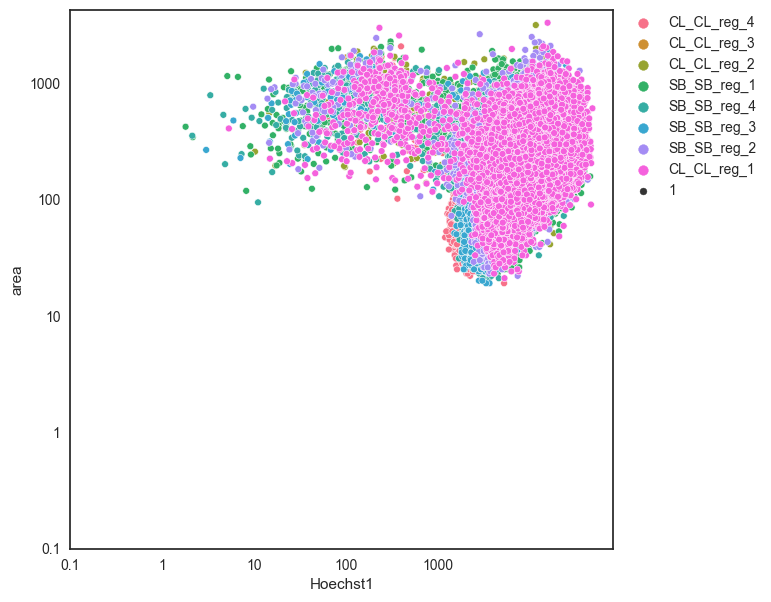

In [3]:
# this is loading the segmentation output 
df, per_keep = pp_read_data(path=data_dir ,\
               reg_list=[], 
               nuc_marker = "Hoechst1",
               metadata_filename = ["donor", "tissue", "region", 'x1','y1','z1'],
               redundant_info = ['x1','y1','z1', 'filename', "label"],
               cell_size= "area") #this is only useful when there are multiple regions. it also helps to format the heading
df.shape # this tells you the dimension of your data

In [4]:
df.columns

Index(['first_index', ' 0', 'Hoechst1', 'Hoechst2', 'MUC2', 'SOX9', 'MUC6',
       'Hoechst3', 'MUC1', 'GATA3', 'CD31', 'Hoechst4', 'Synapto', 'Lefty',
       'CD49f', 'Hoechst5', 'CD15', 'CHGA', 'CDX2', 'Hoechst6', 'ITLN1', 'CD4',
       'CD127', 'Hoechst7', 'Vimentin', 'HLADR', 'CD8', 'Hoechst8', 'CD11c',
       'CD44', 'CD16', 'Hoechst9', 'BCL2', 'CD3', 'CD123', 'Hoechst10', 'CD38',
       'CD90', 'CD279', 'Hoechst11', 'aSMA', 'CD21', 'NKG2D', 'Hoechst12',
       'CD66', 'CD57', 'CD206', 'Hoechst13', 'CD68', 'CD34', 'aDef5',
       'Hoechst14', 'CD7', 'CD36', 'CD138', 'Hoechst15', 'CD45RO',
       'Cytokeratin', 'CK7', 'Hoechst16', 'CollIV', 'CD117', 'PGP95',
       'Hoechst17', 'CD19', 'Podoplanin', 'Hoechst18', 'CD45', 'CD56',
       'Hoechst19', 'CD69', 'CD154', 'Hoechst20', 'Somatostatin', 'Ki67',
       'Hoechst21', 'CD49a', 'CD163', 'Hoechst22', 'CD161', 'CD294',
       'Hoechst23', 'DRAQ5', 'centroid-0', 'centroid-1', 'eccentricity',
       'perimeter', 'convex_area', 'area',

In [5]:
df.head()

,first_index,0,Hoechst1,Hoechst2,MUC2,SOX9,MUC6,Hoechst3,MUC1,GATA3,...,perimeter,convex_area,area,axis_major_length,axis_minor_length,region_num,donor,tissue,region,unique_label
0,0,1,2401.076923,1595.692308,60.634615,213.961538,40.403846,1494.153846,66.615385,120.500000,...,26.485281,55.0,52.0,11.650464,5.762083,4,B004,CL,reg004,CL_CL_reg_4
1,1,2,7188.269231,4728.644231,1898.817308,1037.846154,11.509615,4207.586538,415.615385,253.548077,...,35.556349,106.0,104.0,12.978699,10.362660,4,B004,CL,reg004,CL_CL_reg_4
2,2,3,5303.947368,2235.421053,309.947368,796.631579,36.526316,2110.368421,249.526316,151.684211,...,13.656854,19.0,19.0,5.845028,4.110209,4,B004,CL,reg004,CL_CL_reg_4
3,3,4,2610.397059,2396.573529,3.588235,839.088235,12.132353,2186.735294,53.500000,120.161765,...,28.727922,71.0,68.0,11.003944,7.955090,4,B004,CL,reg004,CL_CL_reg_4
4,4,5,2492.055556,1722.444444,402.814815,870.944444,11.240741,1604.759259,371.259259,190.425926,...,24.485281,56.0,54.0,8.535232,8.035604,4,B004,CL,reg004,CL_CL_reg_4


In [6]:
# rename column 
df.rename(columns={'centroid-0': 'x'}, inplace=True)
df.rename(columns={'centroid-1': 'y'}, inplace=True)

## Noramlize data

In [ ]:
# default cut off is top 1%
def pl_zcount_thres(dfz, col_num, cut_off = 0.01,  count_bin = 50, zsum_bin = 50, figsize=(10,5)):    
    dfz_copy = dfz
    dfz_copy['Count']=dfz.iloc[:,:col_num+1].ge(0).sum(axis=1)
    dfz_copy['z_sum']=dfz.iloc[:,:col_num+1].sum(axis=1)
    fig, axes = plt.subplots(1, 2, constrained_layout=True, figsize = figsize)
    axes[0].hist(dfz_copy['Count'], bins = count_bin)
    axes[0].set_title('Count')
    axes[0].axvline(dfz_copy['Count'].quantile(1-cut_off), color='k', linestyle='dashed', linewidth=1)
    axes[0].text(0.75,  0.75, 'Cut off: {:.2f}'.format(dfz_copy['Count'].quantile(1-cut_off)), ha='right', va='bottom',
        transform=axes[0].transAxes)
    axes[1].hist(dfz_copy['z_sum'], bins = zsum_bin)
    axes[1].title.set_text('Zscore sum')
    axes[1].axvline(dfz_copy['z_sum'].quantile(1-cut_off), color='k', linestyle='dashed', linewidth=1)
    axes[1].text(0.75,  0.75, 'Cut off: {:.2f}'.format(dfz_copy['z_sum'].quantile(1-cut_off)), ha='right', va='bottom',
        transform=axes[1].transAxes)


19.0
287.0313466744006
263.0
3272.0


53.0

1.801909307875895
11867.549081340909
10887.935405179618
48618.29021558872


1571.3442817610062

In [38]:
# This is to normalize the data 
dfz = pp_format(data=df, 
                list_out=['eccentricity', 'perimeter', 'convex_area', 'axis_major_length', 'axis_minor_length', "unique_label"],
                list_keep = ['x','y', 'region_num', 'donor', 'tissue', 'region', 'area', "Hoechst1"],
                method = "zscore") # choose from "zscore", "double_zscore", "MinMax", "ArcSin"

In [39]:
dfz['unique_region'] = dfz.apply(lambda row: str(row['donor']) + "_" + str(row['tissue']) + '_reg' + str(row['region_num']), axis=1)

In [ ]:
#examine unique region per tissue to decide whether or not we need x y correction
pl_catplot(dfz,X = 'x',Y='y',
           exp = 'unique_region', hue = 'unique_region', invert_y=True, size = 12, figsize=4)

## Noise removal

In [41]:
# calculate mean area of cells
print(df['area'].min())
print(df['area'].mean())
print(df['area'].median())
print(df['area'].max())

# calculate one percent quantile of area
df['area'].quantile(0.01)

19.0
287.0313466744006
263.0
3272.0


53.0

In [42]:
# calculate mean area of cells
print(df['Hoechst1'].min())
print(df['Hoechst1'].mean())
print(df['Hoechst1'].median())
print(df['Hoechst1'].max())

# calculate one percent quantile of area
df['Hoechst1'].quantile(0.01)

1.801909307875895
11867.549081340909
10887.935405179618
48618.29021558872


1800.0014123376623

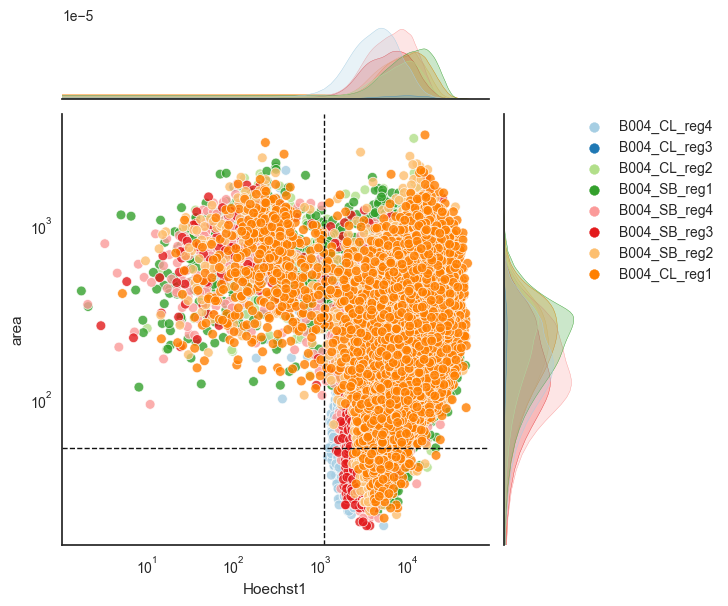

In [47]:
pl_area_nuc_cutoff(dfz, 
                   cutoff_area = 53, 
                   cutoff_nuc = 1100, 
                   cellsize_column="area", 
                   nuc_marker_column="Hoechst1", 
                   color_by="unique_region", 
                   palette="Paired", 
                   alpha=0.8, 
                   size=0.4, 
                   log_scale=True)

In [50]:
dfz = pp_remove_segmentation_artifacts(dfz, 
                                 size_thres=53, 
                                 nuc_thres=1100, 
                                 cellsize_column="area", 
                                 nuc_marker_column="Hoechst1")

In [52]:
dfz = dfz.loc[:, ~dfz.columns.str.contains('Hoechst')]
dfz = dfz.drop(columns=['first_index', ' 0'])

# Print the updated columns
print(dfz.columns)

Index(['MUC2', 'SOX9', 'MUC6', 'MUC1', 'GATA3', 'CD31', 'Synapto', 'Lefty',
       'CD49f', 'CD15', 'CHGA', 'CDX2', 'ITLN1', 'CD4', 'CD127', 'Vimentin',
       'HLADR', 'CD8', 'CD11c', 'CD44', 'CD16', 'BCL2', 'CD3', 'CD123', 'CD38',
       'CD90', 'CD279', 'aSMA', 'CD21', 'NKG2D', 'CD66', 'CD57', 'CD206',
       'CD68', 'CD34', 'aDef5', 'CD7', 'CD36', 'CD138', 'CD45RO',
       'Cytokeratin', 'CK7', 'CollIV', 'CD117', 'PGP95', 'CD19', 'Podoplanin',
       'CD45', 'CD56', 'CD69', 'CD154', 'Somatostatin', 'Ki67', 'CD49a',
       'CD163', 'CD161', 'CD294', 'DRAQ5', 'x', 'y', 'region_num', 'donor',
       'tissue', 'region', 'area', 'unique_region'],
      dtype='object')


## Filter zscore and marker count

In [54]:
# get the column index for the last antibody 
col_num_last_marker = dfz.columns.get_loc('DRAQ5')
print(col_num_last_marker)

57


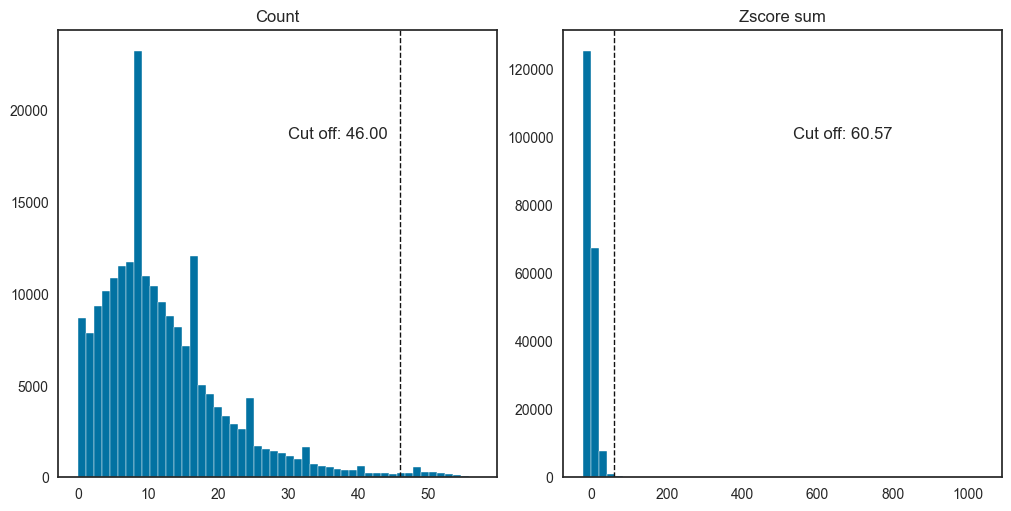

In [55]:
# This function helps to figure out what the cut-off should be
# This is to remove top 1 % of all cells that are highly expressive for all antibodies
pl_zcount_thres(dfz = dfz, 
                col_num = col_num_last_marker, # last antibody index
                cut_off=0.01, #top 1% of cells
                count_bin=50) 

In [56]:
df_nn,cc = pp_remove_noise(df=dfz, 
                           col_num=col_num_last_marker, # this is the column index that has the last protein feature
                           z_sum_thres=46, # number obtained from the function above
                           z_count_thres=60.57 # number obtained from the function above
                          )

0.0 percent of cells are removed.


### Save denoised dataframe 

In [57]:
df_nn.to_csv(output_dir + "df_nn_demo_hubmap_intestine_20231014.csv")

In [58]:
# read df_nn
df_nn = pd.read_csv("/Volumes/Tim_Extern/df_nn_demo_hubmap_intestine_20231014.csv")

FileNotFoundError: [Errno 2] No such file or directory: '/Volumes/Tim_Extern/df_nn_demo_hubmap_intestine_20231014.csv'

In [ ]:
# remove columns "Unnamed: 0" 
df_nn = df_nn.loc[:, ~df_nn.columns.str.contains('^Unnamed')]

In [ ]:
df_nn.columns

Index(['MUC2', 'SOX9', 'MUC6', 'MUC1', 'GATA3', 'CD31', 'Synapto', 'Lefty',
       'CD49f', 'CD15', 'CHGA', 'CDX2', 'ITLN1', 'CD4', 'CD127', 'Vimentin',
       'HLADR', 'CD8', 'CD11c', 'CD44', 'CD16', 'BCL2', 'CD3', 'CD123', 'CD38',
       'CD90', 'CD279', 'aSMA', 'CD21', 'NKG2D', 'CD66', 'CD57', 'CD206',
       'CD68', 'CD34', 'aDef5', 'CD7', 'CD36', 'CD138', 'CD45RO',
       'Cytokeratin', 'CK7', 'CollIV', 'CD117', 'PGP95', 'CD19', 'Podoplanin',
       'CD45', 'CD56', 'CD69', 'CD154', 'Somatostatin', 'Ki67', 'CD49a',
       'CD163', 'CD161', 'CD294', 'DRAQ5', 'x', 'y', 'region_num', 'donor',
       'tissue', 'region', 'area', 'unique_region'],
      dtype='object')

### Convert to anndata format

In [59]:
# inspect which markers work, and drop the ones that did not work from the clustering step
# make an anndata to be compatiable with the downstream clustering step
adata = hf_makeAnndata(df_nn = df_nn,
                       col_sum = col_num_last_marker, # this is the column index that has the last protein feature
                       nonFuncAb_list = [] # remove the antibodies that are not working
                      )

# save the anndata object to a file
adata.write_h5ad(output_dir + 'adata_nn_demo_hubmap_intestine_20231014.h5ad')

/Users/timnoahkempchen/Desktop/SAP5/src/helperfunctions_hf.py:585: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  adata = sc.AnnData(X=df_nn.iloc[:,:col_sum+1].drop(columns = nonFuncAb_list))
/Users/timnoahkempchen/opt/anaconda3/envs/spatial_analysis_environment/lib/python3.10/site-packages/anndata/_core/anndata.py:121: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


### Generate subsetted df 

In [ ]:
tissue_key = pd.read_csv('/Users/timnoahkempchen/Downloads/tissue_key.csv')
tissue_key

# save the donor_region column as a list
donor_region_list = tissue_key['donor_region'].tolist()

In [ ]:
# subset the DataFrame to only keep rows with regions in the donor_region_list
subset_df_nn = df_nn[df_nn['unique_region'].isin(donor_region_list)]

In [ ]:
subset_df_nn.columns

Index(['MUC2', 'SOX9', 'MUC6', 'MUC1', 'GATA3', 'CD31', 'Synapto', 'Lefty',
       'CD49f', 'CD15', 'CHGA', 'CDX2', 'ITLN1', 'CD4', 'CD127', 'Vimentin',
       'HLADR', 'CD8', 'CD11c', 'CD44', 'CD16', 'BCL2', 'CD3', 'CD123', 'CD38',
       'CD90', 'CD279', 'aSMA', 'CD21', 'NKG2D', 'CD66', 'CD57', 'CD206',
       'CD68', 'CD34', 'aDef5', 'CD7', 'CD36', 'CD138', 'CD45RO',
       'Cytokeratin', 'CK7', 'CollIV', 'CD117', 'PGP95', 'CD19', 'Podoplanin',
       'CD45', 'CD56', 'CD69', 'CD154', 'Somatostatin', 'Ki67', 'CD49a',
       'CD163', 'CD161', 'CD294', 'DRAQ5', 'x', 'y', 'region_num', 'donor',
       'tissue', 'region', 'area', 'unique_region'],
      dtype='object')

In [ ]:
# inspect which markers work, and drop the ones that did not work from the clustering step
# make an anndata to be compatiable with the downstream clustering step
adata = hf_makeAnndata(df_nn = subset_df_nn,
                       col_sum = col_num_last_marker, # this is the column index that has the last protein feature
                       nonFuncAb_list = [] # remove the antibodies that are not working
                      )

# save the anndata object to a file
adata.write_h5ad(output_dir + 'adata_nn_demo_hubmap_intestine_20231014_subset.h5ad')

/Users/timnoahkempchen/Desktop/SAP5/src/helperfunctions_hf.py:585: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  adata = sc.AnnData(X=df_nn.iloc[:,:col_sum+1].drop(columns = nonFuncAb_list))
/Users/timnoahkempchen/opt/anaconda3/envs/spatial_analysis_environment/lib/python3.10/site-packages/anndata/_core/anndata.py:121: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
/Users/timnoahkempchen/opt/anaconda3/envs/spatial_analysis_environment/lib/python3.10/site-packages/anndata/_core/anndata.py:798: UserWarning: 
AnnData expects .obs.index to contain strings, but got values like:
    []

    Inferred to be: integer

  value_idx = self._prep_dim_index(value.index, attr)
